# Zuri Velo Counting

Exploring bike usage in Zurich during the year 2016. In this notebook we download data from the year 2016 containing a count of how many bikes passed each of the bike counters in Zurich. 

The data is taken from the Zurich opendata hub.

## Usage

<div style="background: #efffed;
            border: 1px solid grey;
            margin: 8px 0 8px 0;
            text-align: center;
            padding: 8px; ">
    <i class="fa-play fa" 
       style="font-size: 40px;
              line-height: 40px;
              margin: 8px;
              color: #444;">
    </i>
    <div>
    To run the selected code cell, hit <pre style="background: #efffed">Shift + Enter</pre>
    </div>
</div>

In [1]:
%matplotlib inline

import os
from urllib.request import urlretrieve

import matplotlib.pyplot as plt

import pandas as pd

# Fetch and load data

This fetches the data from the city of Zurich server and loads it into a pandas dataframe.

In [2]:
URL = "https://data.stadt-zuerich.ch/dataset/verkehrszaehlungen_werte_fussgaenger_velo/resource/ed354dde-c0f9-43b3-b05b-08c5f4c3f65a/download/2016verkehrszaehlungenwertefussgaengervelo.csv"

In [3]:
if not os.path.exists("2016.csv"):
    urlretrieve(URL, "2016.csv")

In [4]:
data = pd.read_csv("2016.csv", parse_dates=True, index_col='Datum')

In [5]:
data.head()

,ObjectID,Standort,Velo_in,Velo_out,Fuss_in,Fuss_out
Datum,,,,,,
2016-01-15 06:30:00,3463077,U15G3104442,NaN,NaN,7.0,4.0
2016-01-15 06:45:00,3463078,U15G3104442,NaN,NaN,4.0,8.0
2016-01-15 07:00:00,3463079,U15G3104442,NaN,NaN,1.0,12.0
2016-01-15 07:15:00,3463080,U15G3104442,NaN,NaN,5.0,10.0
2016-01-15 07:30:00,3463081,U15G3104442,NaN,NaN,8.0,17.0


In [6]:
location = 'ECO09113499'
mythenquai = data[data.Standort == location]

In [7]:
# subselect only the Velo data
mythenquai = mythenquai[["Velo_in", "Velo_out"]]

In [8]:
# rename for easier plotting
mythenquai.columns = ["North", "South"]

In [9]:
mythenquai['Total'] = mythenquai.North + mythenquai.South

# Bike users per day and hour

Plotting the total bikes counted per week shows that more people cycle in the summer
months. In particular between July and September.

In [10]:
daily = mythenquai.resample('W').sum()
hourly = mythenquai.resample('H').sum()

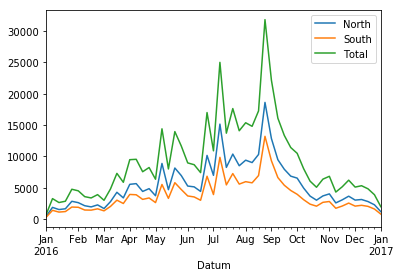

In [11]:
daily.plot()
plt.legend(loc='best');

## Average cyclists per hour

There is a clear pattern of peopel commuting into the city during the morning and returning
in the evening.

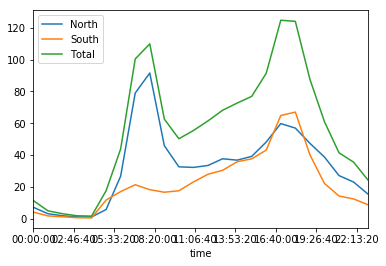

In [12]:
hourly.groupby(hourly.index.time).mean().plot()